## Importing Libraries and Loading data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\harsh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Exploratory Data Analysis

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* The data contains no null values

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Histogram

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

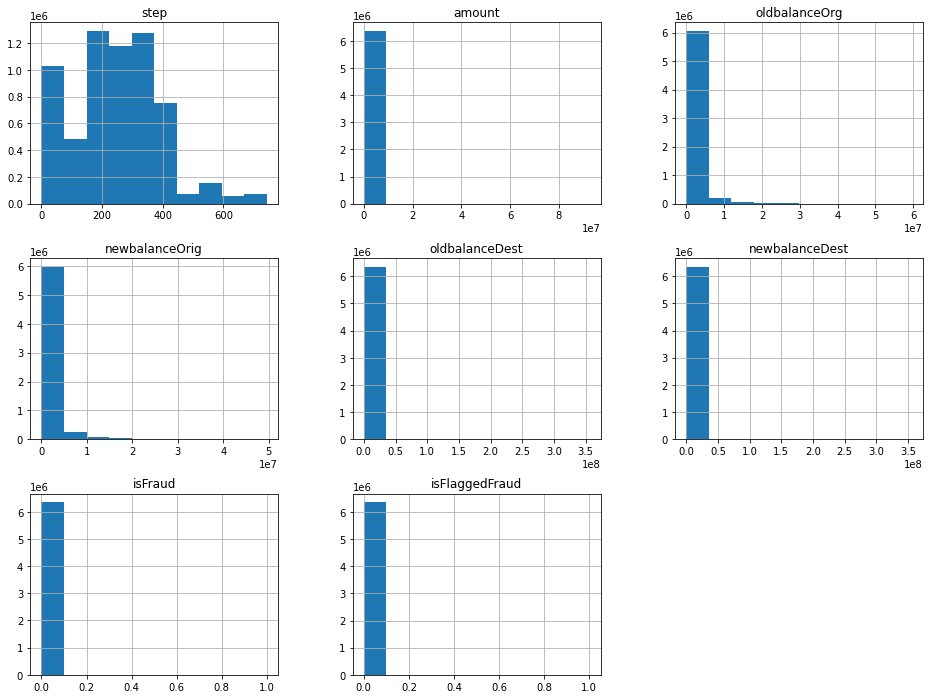

In [6]:
df.hist(figsize=(16,12))

### Correlation Heatmap

<AxesSubplot:>

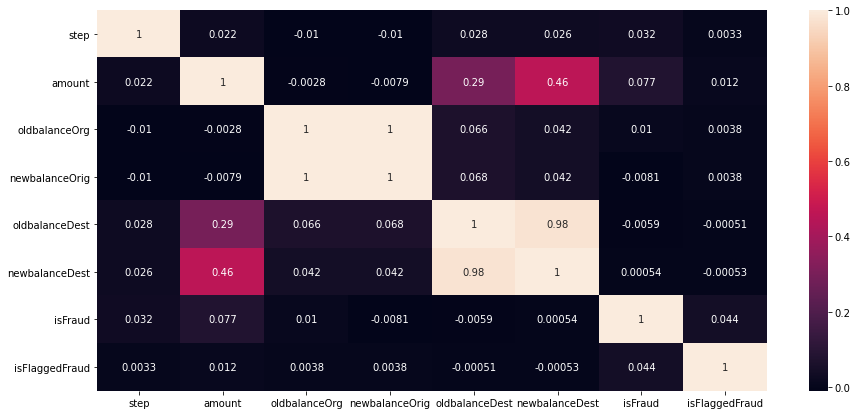

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

* **oldbalanceOrg** is highly correlated with **newbalanceOrig** 
* **oldbalanceDest** is highly correlated with **newbalanceOrg** 

In [8]:
df.isFraud.sum()

8213

* Very small amount of transactions are found to be fraud

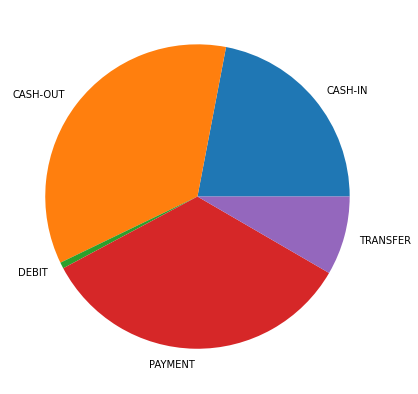

In [9]:
typex = ['CASH-IN', 'CASH-OUT', 'DEBIT',
        'PAYMENT', 'TRANSFER']
 
data = [df.type.value_counts()['CASH_IN'], df.type.value_counts()['CASH_OUT'], 
        df.type.value_counts()['DEBIT'], df.type.value_counts()['PAYMENT'], 
        df.type.value_counts()['TRANSFER']]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = typex)

plt.show()

<AxesSubplot:>

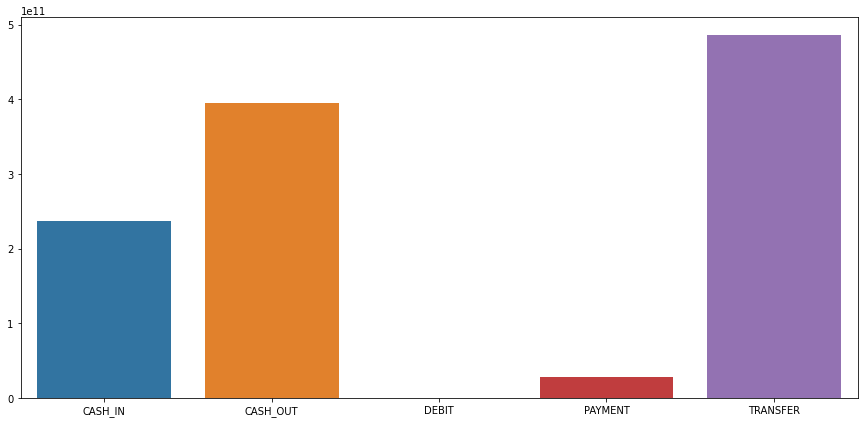

In [10]:
pdata = [df.amount.where(df.type=='CASH_IN').sum(), df.amount.where(df.type=='CASH_OUT').sum()
         , df.amount.where(df.type=='DEBIT').sum(), df.amount.where(df.type=='PAYMENT').sum()
         , df.amount.where(df.type=='TRANSFER').sum()]

plt.figure(figsize=(15,7))
sns.barplot(y=pdata, x=['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

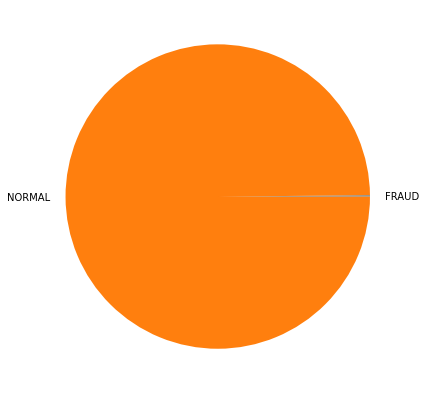

In [11]:
typex = ['FRAUD', 'NORMAL']
 
data = [df.isFraud.value_counts()[1], df.isFraud.value_counts()[0]]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = typex)

plt.show()

<AxesSubplot:>

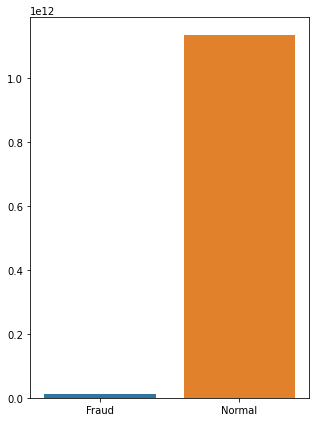

In [12]:
pdata = [df.amount.where(df.isFraud==1).sum(), df.amount.where(df.isFraud==0).sum()]

plt.figure(figsize=(5,7))
sns.barplot(y=pdata, x=['Fraud', 'Normal'])

### Finding and Capping Outliers

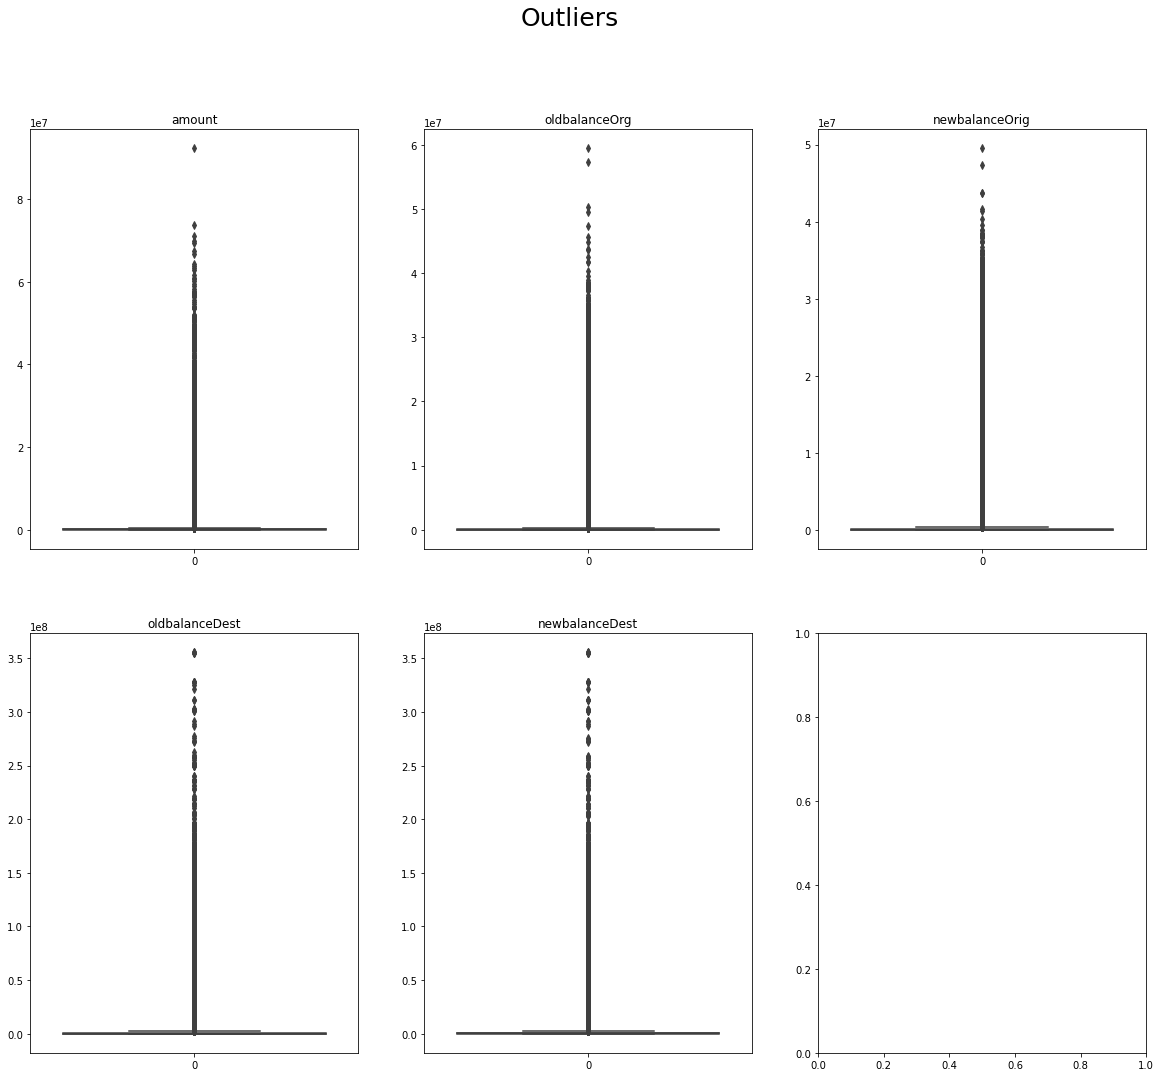

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Outliers', fontsize=25)

ax=sns.boxplot(ax=axes[0,0], data=df['amount'])
ax.set_title('amount')
ax=sns.boxplot(ax=axes[0,1], data=df['oldbalanceOrg'])
ax.set_title('oldbalanceOrg')
ax=sns.boxplot(ax=axes[0,2], data=df['newbalanceOrig'])
ax.set_title('newbalanceOrig')
ax=sns.boxplot(ax=axes[1,0], data=df['oldbalanceDest'])
ax.set_title('oldbalanceDest')
ax=sns.boxplot(ax=axes[1,1], data=df['newbalanceDest'])
ax.set_title('newbalanceDest')

plt.show()

In [14]:
new_df = df.copy()

In [15]:
Q1 = np.percentile(df['amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['amount'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

print("Upper bound:", upper_limit)
print("Lower bound:", lower_limit)
n = ((df['amount'] < lower_limit) | (df['amount'] > upper_limit)).sum()
print("No. of Outliers:", n)
print("Percentage of Outliers:", n/len(df['amount']) )

Upper bound: 501719.4075
Lower bound: -279608.33249999996
No. of Outliers: 338077
Percentage of Outliers: 0.05313487211243167


In [16]:
new_df['amount'] = np.where(
    new_df['amount'] > upper_limit,
    upper_limit,
    np.where(
        new_df['amount'] < lower_limit,
        lower_limit,
        new_df['amount']
    )
)

In [17]:
Q1 = np.percentile(df['oldbalanceOrg'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['oldbalanceOrg'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

print("Upper bound:", upper_limit)
print("Lower bound:", lower_limit)
n = ((df['oldbalanceOrg'] < lower_limit) | (df['oldbalanceOrg'] > upper_limit)).sum()
print("No. of Outliers:", n)
print("Percentage of Outliers:", n/len(df['oldbalanceOrg']) )

Upper bound: 268288.375
Lower bound: -160973.02500000002
No. of Outliers: 1112507
Percentage of Outliers: 0.17485045468690572


In [18]:
new_df['oldbalanceOrg'] = np.where(
    new_df['oldbalanceOrg'] > upper_limit,
    upper_limit,
    np.where(
        new_df['oldbalanceOrg'] < lower_limit,
        lower_limit,
        new_df['oldbalanceOrg']
    )
)

In [19]:
Q1 = np.percentile(df['newbalanceOrig'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['newbalanceOrig'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

print("Upper bound:", upper_limit)
print("Lower bound:", lower_limit)
n = ((df['newbalanceOrig'] < lower_limit) | (df['newbalanceOrig'] > upper_limit)).sum()
print("No. of Outliers:", n)
print("Percentage of Outliers:", n/len(df['newbalanceOrig']) )

Upper bound: 360646.025
Lower bound: -216387.615
No. of Outliers: 1053391
Percentage of Outliers: 0.16555931361608897


In [20]:
new_df['newbalanceOrig'] = np.where(
    new_df['newbalanceOrig'] > upper_limit,
    upper_limit,
    np.where(
        new_df['newbalanceOrig'] < lower_limit,
        lower_limit,
        new_df['newbalanceOrig']
    )
)

In [21]:
Q1 = np.percentile(df['oldbalanceDest'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['oldbalanceDest'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

print("Upper bound:", upper_limit)
print("Lower bound:", lower_limit)
n = ((df['oldbalanceDest'] < lower_limit) | (df['oldbalanceDest'] > upper_limit)).sum()
print("No. of Outliers:", n)
print("Percentage of Outliers:", n/len(df['oldbalanceDest']) )

Upper bound: 2357592.2125000004
Lower bound: -1414555.3275000001
No. of Outliers: 786135
Percentage of Outliers: 0.12355523353587045


In [22]:
new_df['oldbalanceDest'] = np.where(
    new_df['oldbalanceDest'] > upper_limit,
    upper_limit,
    np.where(
        new_df['oldbalanceDest'] < lower_limit,
        lower_limit,
        new_df['oldbalanceDest']
    )
)

In [23]:
Q1 = np.percentile(df['newbalanceDest'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['newbalanceDest'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

print("Upper bound:", upper_limit)
print("Lower bound:", lower_limit)
n = ((df['newbalanceDest'] < lower_limit) | (df['newbalanceDest'] > upper_limit)).sum()
print("No. of Outliers:", n)
print("Percentage of Outliers:", n/len(df['newbalanceDest']) )

Upper bound: 2779773.3499999996
Lower bound: -1667864.0099999998
No. of Outliers: 738527
Percentage of Outliers: 0.11607278133850521


In [24]:
new_df['newbalanceDest'] = np.where(
    new_df['newbalanceDest'] > upper_limit,
    upper_limit,
    np.where(
        new_df['newbalanceDest'] < lower_limit,
        lower_limit,
        new_df['newbalanceDest']
    )
)

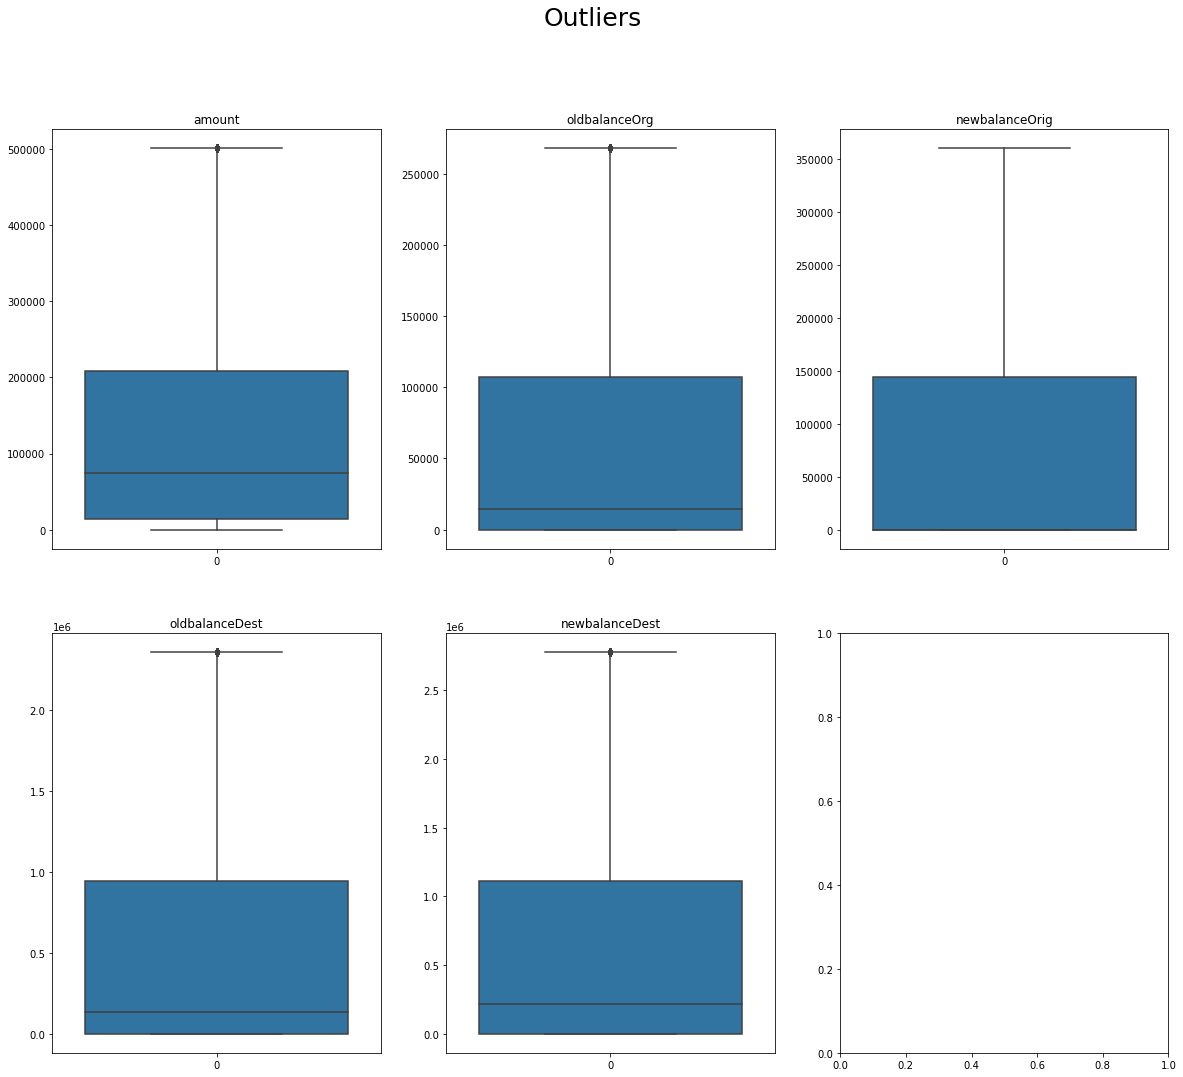

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Outliers', fontsize=25)

ax=sns.boxplot(ax=axes[0,0], data=new_df['amount'])
ax.set_title('amount')
ax=sns.boxplot(ax=axes[0,1], data=new_df['oldbalanceOrg'])
ax.set_title('oldbalanceOrg')
ax=sns.boxplot(ax=axes[0,2], data=new_df['newbalanceOrig'])
ax.set_title('newbalanceOrig')
ax=sns.boxplot(ax=axes[1,0], data=new_df['oldbalanceDest'])
ax.set_title('oldbalanceDest')
ax=sns.boxplot(ax=axes[1,1], data=new_df['newbalanceDest'])
ax.set_title('newbalanceDest')

plt.show()

* Outliers are removed from the dataset

### Fraud vs Normal Transactions

In [26]:
fraud = df[df['isFraud']==1]

normal = df[df['isFraud']==0]

In [27]:
print(fraud.shape, normal.shape)

(8213, 11) (6354407, 11)


In [28]:
fraud.newbalanceOrig.value_counts()[0]

8053

* Out of 8213 frauds, 8053 frauds have newbalanceOrig equal to 0

In [29]:
fraud.newbalanceDest.value_counts()[0]

4091

In [30]:
fraud.oldbalanceDest.value_counts()[0]

5351

In [31]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [32]:
normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

(array([6.305206e+06, 3.355000e+04, 6.026000e+03, 2.342000e+03,
        1.465000e+03, 3.655000e+03, 3.950000e+02, 3.230000e+02,
        2.630000e+02, 2.280000e+02, 1.500000e+02, 1.260000e+02,
        1.030000e+02, 9.100000e+01, 6.300000e+01, 5.500000e+01,
        6.000000e+01, 5.300000e+01, 4.600000e+01, 4.200000e+01,
        3.100000e+01, 2.600000e+01, 1.400000e+01, 7.000000e+00,
        9.000000e+00, 1.700000e+01, 1.400000e+01, 1.000000e+01,
        3.000000e+00, 8.000000e+00, 6.000000e+00, 4.000000e+00,
        4.000000e+00, 2.000000e+00, 3.000000e+00, 0.000000e+00,
        2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.00000000e-02, 1.84891034e+06, 3.69782068e+06, 5.54673101e+06,
        7.39564134e+06, 9.24455167e+06, 1.10934620e+07, 1.29423723e+07,
        1.47912827e+07, 1.66401930e+07, 1.84891033

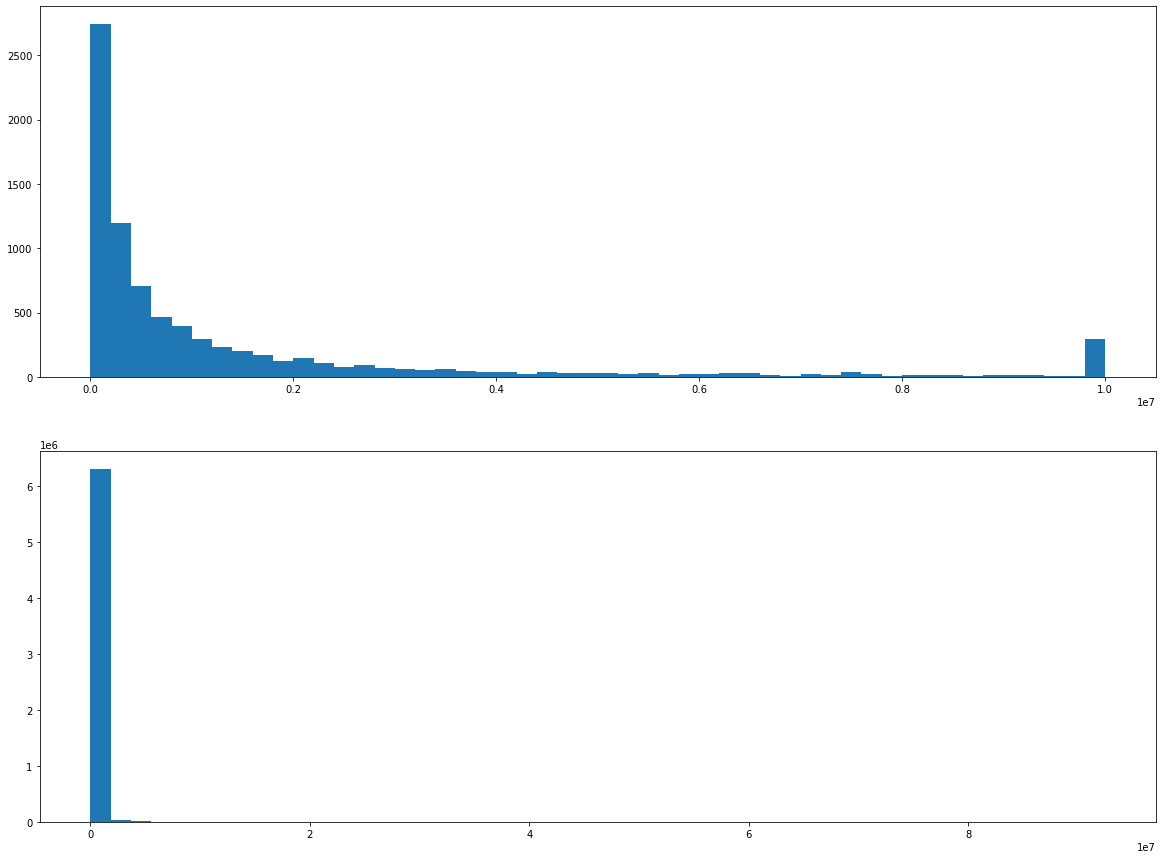

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
bins = 50

ax1.hist(fraud['amount'], bins = bins)

ax2.hist(normal['amount'], bins = bins)

* Smaller amount of Transactions took place in case of Frauds

<AxesSubplot:>

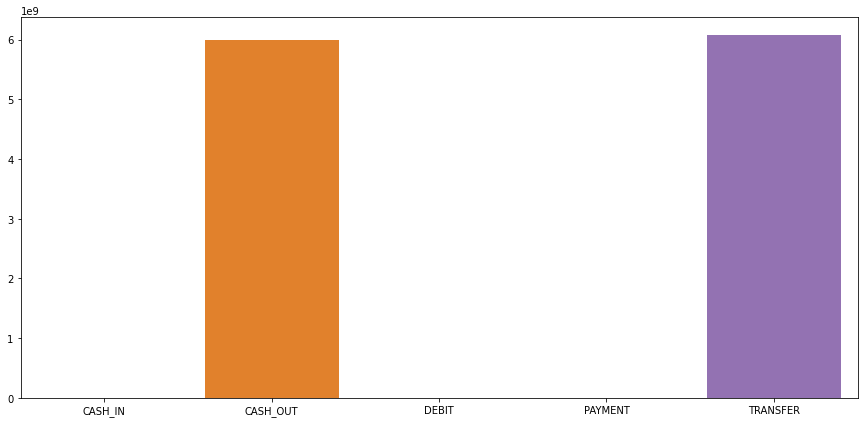

In [34]:
pdata = [fraud.amount.where(fraud.type=='CASH_IN').sum(), fraud.amount.where(fraud.type=='CASH_OUT').sum()
         , fraud.amount.where(fraud.type=='DEBIT').sum(), fraud.amount.where(fraud.type=='PAYMENT').sum()
         , fraud.amount.where(fraud.type=='TRANSFER').sum()]

plt.figure(figsize=(15,7))
sns.barplot(y=pdata, x=['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

* CASH_OUT and TRANSFER are the major ways through which frauds are committed

## Model Building

### Isolation Forest & Local Outlier Factor

In [35]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [42]:
df1 = df.sample(frac = 0.01, random_state=1)

In [43]:
state = np.random.RandomState(42)
X = df1[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
Y = df1['isFraud']
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(63626, 5)
(63626,)


In [44]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6322570,23557.12,8059.00,31616.12,169508.66,145951.53
3621196,6236.13,0.00,0.00,0.00,0.00
1226256,33981.87,18745.72,0.00,0.00,0.00
2803274,263006.42,20072.00,0.00,390253.56,653259.98
3201247,152013.74,20765.00,0.00,252719.19,404732.93


In [45]:
outlier_fraction = len(fraud)/float(len(normal))

In [46]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    
   # "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
   
}

In [47]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 165
Accuracy Score :
0.9974067205230566
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63536
           1       0.05      0.04      0.05        90

    accuracy                           1.00     63626
   macro avg       0.52      0.52      0.52     63626
weighted avg       1.00      1.00      1.00     63626

Local Outlier Factor: 171
Accuracy Score :
0.9973124194511678
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63536
           1       0.01      0.01      0.01        90

    accuracy                           1.00     63626
   macro avg       0.51      0.50      0.51     63626
weighted avg       1.00      1.00      1.00     63626



(SVM is not shown here as it was taking too long to evaluate.)

### Decision Tree

In [48]:
fraud1 = fraud.iloc[:8000]
normal1 = normal.iloc[:8000]

In [49]:
df1 = fraud1.append(normal1, ignore_index=True)

In [50]:
X = df1[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
Y = df1['isFraud']

In [51]:
print(X.shape)
print(Y.shape)

(16000, 5)
(16000,)


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred)


array([[1573,   23],
       [  15, 1589]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)*100


98.8125

In [56]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1596\n           1       0.99      0.99      0.99      1604\n\n    accuracy                           0.99      3200\n   macro avg       0.99      0.99      0.99      3200\nweighted avg       0.99      0.99      0.99      3200\n'

## Data cleaning including missing values, outliers and multi-collinearity

* No missing values in the data are found.


* Outliers are found in each of the features respectively and thay have been taken care of by using capping


* **oldbalanceOrg** is highly correlated with **newbalanceOrig**, **oldbalanceDest** is highly correlated with **newbalanceOrg**

## Fraud detection models

**Isolation Forest Algorithm:**

The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

**Local Outlier Factor(LOF) Algorithm:**

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

**Decision Tree Algorithm:**

A decision tree builds upon iteratively asking questions to partition data. The aim of the decision tree algorithm is to increase the predictiveness as much as possible at each partitioning so that the model keeps gaining information about the dataset. Randomly splitting the features does not usually give us valuable insight into the dataset. Splits that increase purity of nodes are more informative. The purity of a node is inversely proportional to the distribution of different classes in that node. The questions to ask are chosen in a way that increases purity or decrease impurity.